In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [30]:
#import our prepared dataframe

df=pd.read_csv('Datasets/FinalDF.csv')
df.head()

,SURVMNTH,LFSSTAT,PROV,AGE_12,SEX,EDUC,NAICS_21,NOC_10,NOC_40,COWMAIN,FTPTMAIN,QUARTER,VOLUNTARY_PT
0,1,"1-Employed, at work",59,8,1-Male,5,14.0,3.0,10.0,6.0,2-Part-time,2022Q1,False
1,1,"1-Employed, at work",12,6,2-Female,6,16.0,5.0,16.0,1.0,1-Full-time,2022Q1,False
2,1,4-Not in labour force,46,11,1-Male,2,6.0,8.0,29.0,6.0,0-Not applicable,2022Q1,False
3,1,"2-Employed, absent from work",35,5,2-Female,6,14.0,2.0,5.0,2.0,1-Full-time,2022Q1,False
4,1,"1-Employed, at work",24,7,2-Female,4,17.0,5.0,18.0,1.0,1-Full-time,2022Q1,False


In [9]:
#importing reference document
educ=pd.read_csv('Datasets/ref_educ.csv')

# Exploring 5.1 End all forms of discrimination against all women and girls everywhere

In [16]:
#finding unemployment levels

def unemployment(group):
    #formula is as follows: unemployment rate = 
    #multiple by 100 since we are used to see the unemployment rate measured as a percentage
    return round(group[group['LFSSTAT'].isin(['3-Unemployed'])]['LFSSTAT'].count()/group[group['LFSSTAT'].isin(['1-Employed, at work',
                                                                                                                       '2-Employed, absent from work',
                                                                                                                       '3-Unemployed'])]['LFSSTAT'].count()*100,2)

In [31]:
#grouping by sex and education level 
EducVUnem=df.groupby(['SEX'
                      ,'EDUC'], as_index=False).apply(unemployment)

In [32]:
#renaming columns
EducVUnem.columns=['Sex'
                   ,'Education',
                   'Unemployement_Rate']

In [35]:
#here is a table of male and female education levesl vs unemployment rates
EducVUnem

,Sex,Education,Unemployement_Rate
0,1-Male,0,9.40
1,1-Male,1,11.06
2,1-Male,2,6.98
3,1-Male,3,7.44
4,1-Male,4,4.82
5,1-Male,5,3.77
6,1-Male,6,3.27
7,2-Female,0,10.45
8,2-Female,1,11.66
9,2-Female,2,6.43


<IPython.core.display.Javascript object>


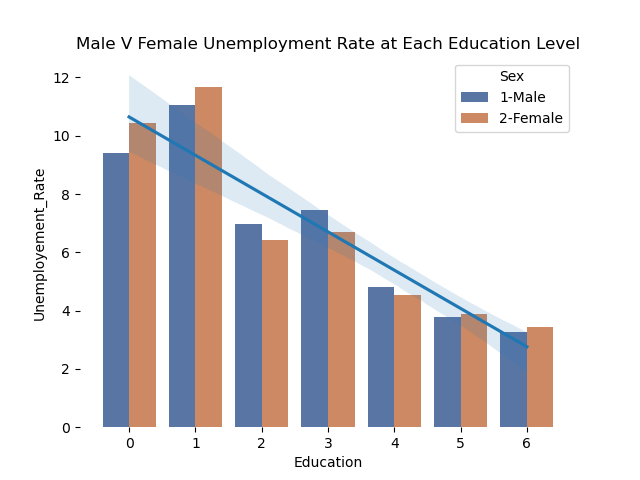

In [61]:
#creating graph for unemployment vs education levels, grouped by sex
graph1=sns.barplot(x='Education',
            y='Unemployement_Rate',
            data=EducVUnem,
            hue='Sex',
           palette='deep')

#creating a trendline to show a relationship between higher levels of education and lower unemployment rate
sns.despine(left = True, bottom = True)
sns.regplot(x='Education',
            y='Unemployement_Rate',
            data=EducVUnem,
           scatter=False)

#set graph titles
graph1.set_title('Male V Female Unemployment Rate at Each Education Level')

#saving graph
plt.savefig('Datasets/output_g5_educVsUnemp.png')

In [139]:
#from this group we observe a gap in unemployment rate between male and females, with unemployment rate for females
#higher at both the lower and higher end of education levels

#this brings concerns with the availability of opportunities for the female labour force who are less educated.
#there is a higher risk of poverty for females who meet the criteria of
#little education and lack of employment

#the graph also shows that as long as you graduate high school (education level >1), the unemployment rate significantly
#drops.


In [43]:
educ

,code,en_label,fr_label
0,0,0 to 8 years,0 à 8 années
1,1,Some high school,Études secondaires partielles
2,2,High school graduate,Études secondaires complétées
3,3,Some postsecondary,Études postsecondaires partielles
4,4,Postsecondary certificate or diploma,Diplôme ou certificat d'études postsecondaires
5,5,Bachelor's degree,Baccalauréat
6,6,Above bachelor's degree,Diplôme ou certificat universitaire supérieur ...


# Exploring 5.5.2: Proportion of women in managerial positions

In [46]:
# NOC_10 is a statistic that signifies occupation of the employed, we will use the function created in task two to
# return a reference table for NOC_10 and import the table

In [48]:
noc10=pd.read_csv('Datasets/ref_noc_10.csv')

In [49]:
#examining the reference table
noc10

,code,en_label,fr_label
0,1,Management occupations,Gestion
1,2,"Business, finance and administration occupations","Affaires, finance et administration"
2,3,Natural and applied sciences and related occup...,Sciences naturelles et appliquées et domaines ...
3,4,Health occupations,Secteur de la santé
4,5,"Occupations in education, law and social, comm...","Enseignement, droit et services sociaux, commu..."
5,6,"Occupations in art, culture, recreation and sport","Arts, culture, sports et loisirs"
6,7,Sales and service occupations,Vente et services
7,8,"Trades, transport and equipment operators and ...","Métiers, transport, machinerie et domaines app..."
8,9,"Natural resources, agriculture and related pro...","Ressources naturelles, agriculture et producti..."
9,10,Occupations in manufacturing and utilities,Fabrication et services d'utilité publique


In [50]:
#from here, we can see that Managerial positions is represented as code 1

In [54]:
#since there are NAs in the dataframe, we will replace them with zero as we did to create the reference table
df['NOC_10'].isna().sum()

341092

In [55]:
#filling NAs with zero
df['NOC_10']=df['NOC_10'].fillna(0)

In [58]:
# we will create a column that indicate whether the individual is a manager
df['ISMGR']=np.where(df['NOC_10']==1,'Manager','Not Manager')

In [66]:
len(df[df['ISMGR'].isin(['Manager']) & df['LFSSTAT'].isin(['1-Employed, at work', 
                                                  '2-Employed, absent from work'])])

55423

In [68]:
# creating a function to calculate percentage of managers in a group

def Manager_Percentage(group):
    #determine all managers who are employed vs those who are employed and are not managers
    #multiple by 100 since we are used to see the unemployment rate measured as a percentage
    return round(len(group[group['ISMGR'].isin(['Manager']) & group['LFSSTAT'].isin(['1-Employed, at work',
                                                                                     '2-Employed, absent from work'])])/
                 len(group[group['LFSSTAT'].isin(['1-Employed, at work', 
                                                  '2-Employed, absent from work'])])*100,2)

In [72]:
# explore managerial percentage at every age group

age_12=pd.read_csv('Datasets/ref_age_12.csv')

In [73]:
#map to values
df['AGE_12']=df['AGE_12'].map(lambda x: age_12['en_label'][age_12['code']==x].values)

In [74]:
df['AGE_12'].head()

0    [50 to 54 years]
1    [40 to 44 years]
2    [65 to 69 years]
3    [35 to 39 years]
4    [45 to 49 years]
Name: AGE_12, dtype: object

In [75]:
#clean string
df['AGE_12']=df['AGE_12'].str[0]

In [76]:
#goupby 
MgrByAge=df.groupby(['SEX','AGE_12'], as_index=False).apply(Manager_Percentage)

In [77]:
#assigning column names
MgrByAge.columns=['Sex','Age Group','Managerial Percentage']

<IPython.core.display.Javascript object>


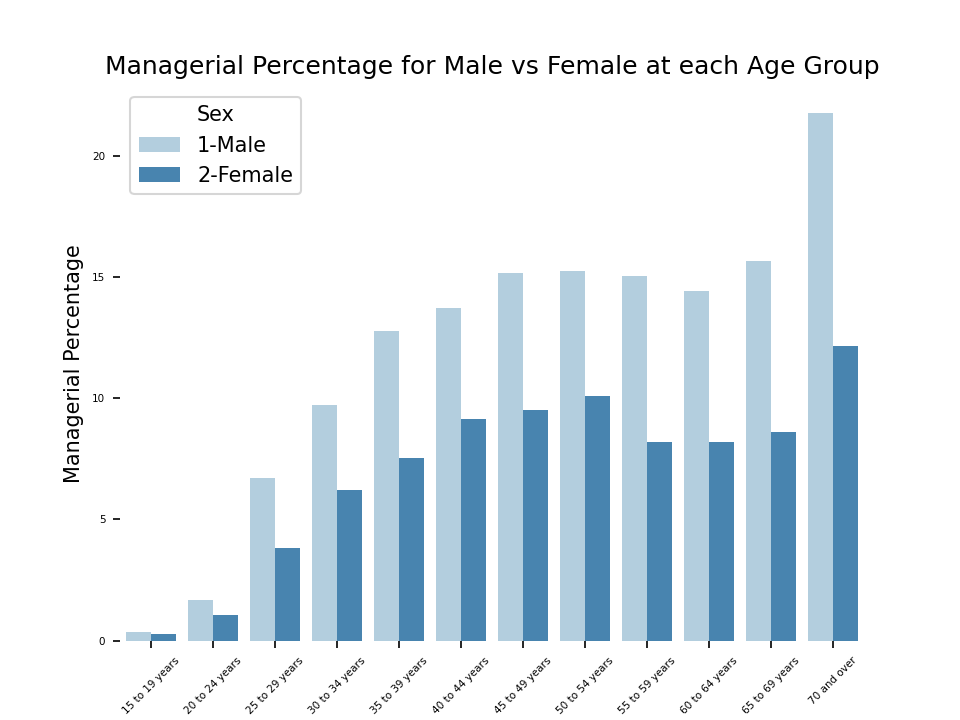

In [91]:
# plot relationship
plt.figure()
graph2=sns.barplot(x='Age Group',
            y='Managerial Percentage',
            data=MgrByAge,
            hue='Sex',
           palette='Blues')

sns.despine(left = True, bottom = True)
plt.xticks(rotation=45)

graph2.tick_params(labelsize=5)

graph2.set_title('Managerial Percentage for Male vs Female at each Age Group')

plt.savefig('Datasets/output_g5_MgrByAgeGroup.png')

In [89]:
#There is a siginificant gap between males and females in managerial positions at every age group
#Focus needs to be to ensure female workers to have the ability to succeed in the workplace

In [90]:
#This calls for an examination of Canada's committment to Goal 5.c.a
#Adopt and strengthen sound policies and enforceable legislation for the promotion of gender equality and 
#the empowerment of all women and girls at all levels

# Exploring Goal 5.5.2, Education Level for women of all ages

In [93]:
# Previously we discovered that unemployment rate drops significantly with high school graduation
# Want to explore further on the education level for women at every age group

In [94]:
df.head()

,SURVMNTH,LFSSTAT,PROV,AGE_12,SEX,EDUC,NAICS_21,NOC_10,NOC_40,COWMAIN,FTPTMAIN,QUARTER,VOLUNTARY_PT,ISMGR
0,1,"1-Employed, at work",59,50 to 54 years,1-Male,5,14.0,3.0,10.0,6.0,2-Part-time,2022Q1,False,Not Manager
1,1,"1-Employed, at work",12,40 to 44 years,2-Female,6,16.0,5.0,16.0,1.0,1-Full-time,2022Q1,False,Not Manager
2,1,4-Not in labour force,46,65 to 69 years,1-Male,2,6.0,8.0,29.0,6.0,0-Not applicable,2022Q1,False,Not Manager
3,1,"2-Employed, absent from work",35,35 to 39 years,2-Female,6,14.0,2.0,5.0,2.0,1-Full-time,2022Q1,False,Not Manager
4,1,"1-Employed, at work",24,45 to 49 years,2-Female,4,17.0,5.0,18.0,1.0,1-Full-time,2022Q1,False,Not Manager


In [95]:
#making a column that maps the education level

df['EDUCATION']=df['EDUC'].map(lambda x: educ['en_label'][educ['code']==x].values)

In [97]:
#cleaning the string
df['EDUCATION']=df['EDUCATION'].str[0]

In [99]:
df.head()

,SURVMNTH,LFSSTAT,PROV,AGE_12,SEX,EDUC,NAICS_21,NOC_10,NOC_40,COWMAIN,FTPTMAIN,QUARTER,VOLUNTARY_PT,ISMGR,EDUCATION
0,1,"1-Employed, at work",59,50 to 54 years,1-Male,5,14.0,3.0,10.0,6.0,2-Part-time,2022Q1,False,Not Manager,Bachelor's degree
1,1,"1-Employed, at work",12,40 to 44 years,2-Female,6,16.0,5.0,16.0,1.0,1-Full-time,2022Q1,False,Not Manager,Above bachelor's degree
2,1,4-Not in labour force,46,65 to 69 years,1-Male,2,6.0,8.0,29.0,6.0,0-Not applicable,2022Q1,False,Not Manager,High school graduate
3,1,"2-Employed, absent from work",35,35 to 39 years,2-Female,6,14.0,2.0,5.0,2.0,1-Full-time,2022Q1,False,Not Manager,Above bachelor's degree
4,1,"1-Employed, at work",24,45 to 49 years,2-Female,4,17.0,5.0,18.0,1.0,1-Full-time,2022Q1,False,Not Manager,Postsecondary certificate or diploma


In [125]:
def Females_Education(group):
    #determine percentage of females in a given group
    #multiple by 100 since we are used to see rate as a percentage
    return round(len(group[group['EDUC']>1])/
                 len(group['EDUC'])*100,2)

In [129]:
#calculate % of females in any given education rate
HSGraduatePerc=df.groupby(['SEX'
                           ,'AGE_12'],
                          as_index=False).apply(Females_Education)

In [133]:
HSGraduatePerc.columns=['Sex','Age Group','HS Graduate%']

<IPython.core.display.Javascript object>


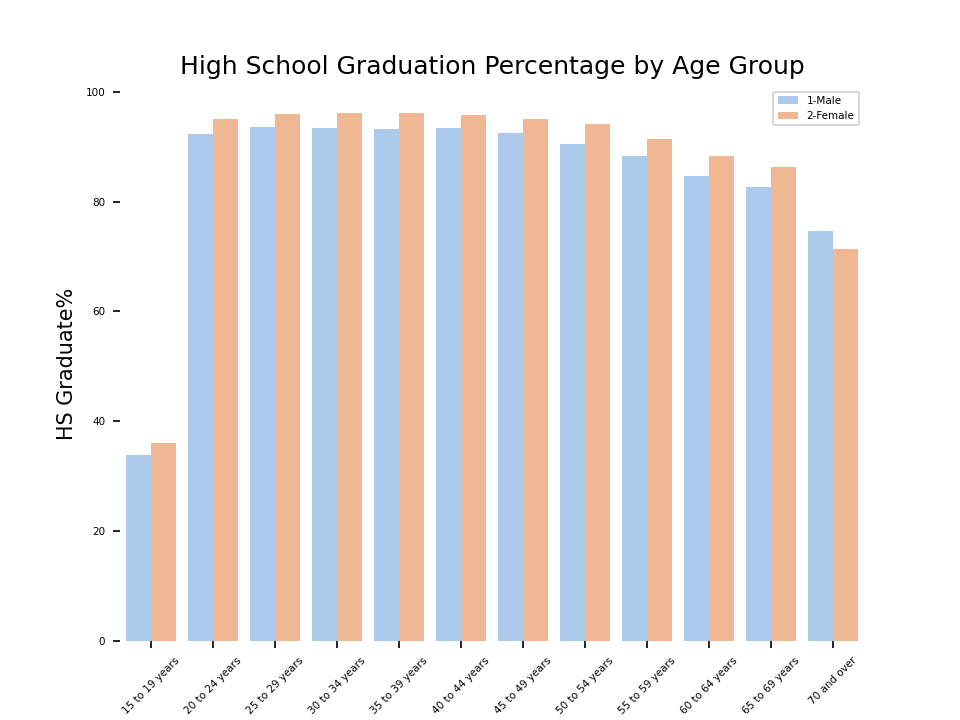

In [138]:
#graph 3

plt.figure()
graph3=sns.barplot(x='Age Group',
            y='HS Graduate%',
            data=HSGraduatePerc,
            hue='Sex',
           palette='pastel')

sns.despine(left = True, bottom = True)
plt.xticks(rotation=45)

graph3.tick_params(labelsize=5)

plt.legend(fontsize=5)

graph3.set_title('High School Graduation Percentage by Age Group')

plt.savefig('Datasets/output_g5_HSGraduationPerc.png')

In [140]:
# Here it shows that females actually have a higher high school completion rate in almost all age groups
# this means Canada as a country is doing well in giving women access to education 